## Summer Hackathon - Covid19 EDA

In [1]:
import pandas as pd

%matplotlib inline
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


In [2]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import pandas as pd
from collections import Counter
import pandas as pd
from nltk import tokenize 
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

In [3]:
from nltk import tokenize 


In [4]:
#sentence split all documents
df = pd.read_excel("/Users/lolajohnston/Desktop/covid-19-data-master/Final_Hackathon_1082Patients.xlsx")
df.columns = ['id','note']

In [5]:
# check for missing data
df.isnull().sum()

id      0
note    0
dtype: int64

In [6]:
# Expand Contractions

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)


In [7]:
# Expanding contractions
df['cleaned'] = df['note'].apply(lambda x: expand_contractions(x))

# Lower case
df['cleaned']=df['cleaned'].apply(lambda x: x.lower())

# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

# Count length of each document (clinical note)
df['totalwords'] = df['cleaned'].str.split().str.len()

# Remove punctuations
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [1066]:
# not doing this method

'''
sentences = []
for i in range(len(raw['cleaned'])):
    sentences.append(tokenize.sent_tokenize(raw['cleaned'][i]))

raw['sent'] = sentences
'''

"\nsentences = []\nfor i in range(len(raw['cleaned'])):\n    sentences.append(tokenize.sent_tokenize(raw['cleaned'][i]))\n\nraw['sent'] = sentences\n"

### Features:

 - Treat unnamed column as the patient id 

 ### Inclusion criteria:
 - Tested positive for covid-19 (bool)
 - Age (int)
 - BMI (float)
 - Sex (int)
 - Given written informed consent (bool)
 - No known allergies to drugs (bool)

In [1067]:
'''
# phrasing
covid_phrasing = ['covid','covid19']
age_phrasing = ['45 female', '45 male', 'age 45', '45 year old', '45yo', '45 yo']
sex_phrasing = ['female','male','woman','man','m', 'f']
consent_phrasing = ['consent','agree']
'''

# INITIAL EDA ON SEX & AGE

                age_text  age_num        binned
21     female 45 arrived       45  (40.0, 50.0]
23   female returned 121      121           NaN
33       female 25 nurse       25  (20.0, 30.0]
40    female 22 traveled       22  (20.0, 30.0]
46        female with 16       16  (10.0, 20.0]
..                   ...      ...           ...
701    female 32 visited       32  (30.0, 40.0]
705    female 18 visited       18  (10.0, 20.0]
709        female age 44       44  (40.0, 50.0]
710        female age 60       60  (50.0, 60.0]
712      female 56 wuhan       56  (50.0, 60.0]

[325 rows x 3 columns]


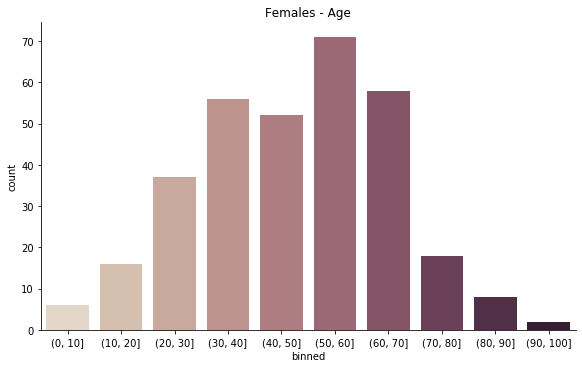

In [8]:
# check for females

ftest = sum(list(df['cleaned'].map(lambda s: re.findall(r"female\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
ftest = pd.DataFrame(ftest, columns = ['age_text'])
ftest['age_num'] = ftest.age_text.str.extract('(\d+)')
ftest = ftest.dropna(subset=['age_num'])
ftest['age_num'] = pd.to_numeric(ftest['age_num'] )


bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#labels = ["< 10","10","20", "30", "40", "50", "60", "70", "80", "90"]
ftest['binned'] = pd.cut(ftest['age_num'], bins)
print (ftest)

sns.catplot(x="binned", kind="count", palette="ch:.25", data=ftest, height=5, aspect=8/5).set(title = 'Females - Age')


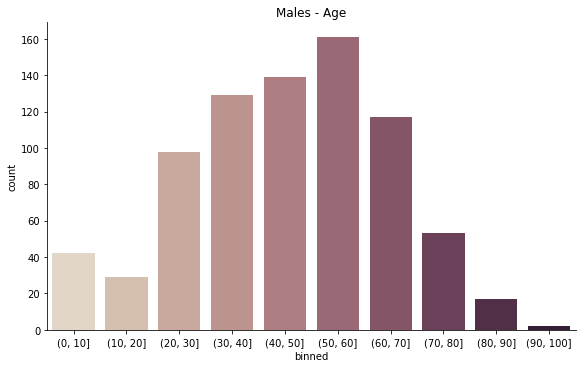

In [29]:
# check for males
testing = sum(list(df['cleaned'].map(lambda s: re.findall(r"male\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
testing = pd.DataFrame(testing, columns = ['age_text'])
testing['age_num'] = testing.age_text.str.extract('(\d+)')
testing = testing.dropna(subset=['age_num'])
testing['age_num'] = pd.to_numeric(testing['age_num'] )
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#labels = ["< 10","10","20", "30", "40", "50", "60", "70", "80", "90"]
testing['binned'] = pd.cut(testing['age_num'], bins)


testing['binned'].value_counts()


sns.catplot(x="binned", kind="count", palette="ch:.25", data=testing,height=5, aspect=8/5).set(title = 'Males - Age')


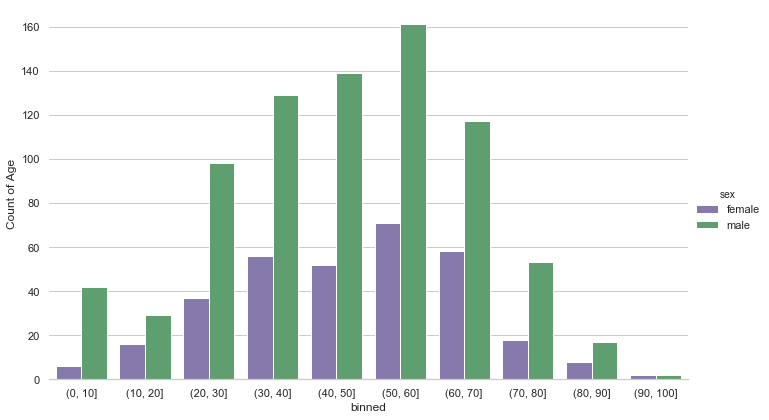

In [30]:
# plotting together

ftest['sex']= 'female'
testing['sex'] = 'male'
df_age = pd.concat([ftest,testing])


sns.set(style="whitegrid")
g = sns.catplot(x="binned", hue="sex", data=df_age,
                height=6, aspect = 8/5, kind="count", palette=["m", "g"])
g.despine(left=True)
g.set_ylabels("Count of Age")

In [31]:
# get the sex split percentages

female_percentage = len(ftest.sex)/1113
male_percentage = len(testing.sex)/1113
print("percentage of female: " + str((round(female_percentage, 4))*100))
print("percentage of male: " + str((round(male_percentage, 2))*100))

percentage of female: 29.2
percentage of male: 71.0


In [9]:
# column for female
df['female'] = df['cleaned'].map(lambda x: True if 'female' in x else False)
# column for covid
df['covid'] = df['cleaned'].map(lambda x: True if 'covid' in x else False)

In [10]:
df.female.value_counts(dropna = False)

False    553
True     528
Name: female, dtype: int64

In [12]:
df['f_age'] = df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+)\S*(?:\s\S+) female \S*(?:\s\S+)?\S*(?:\s\S+)?",s))
df['f_age'] = df['f_age'].astype(str)
df['age_num'] = df.f_age.str.extract('(\d+)')

In [13]:
df['m_age'] = df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+)\S*(?:\s\S+) male \S*(?:\s\S+)?\S*(?:\s\S+)?",s))
df['m_age'] = df['m_age'].astype(str)
df['m_age_num'] = df.m_age.str.extract('(\d+)')

In [14]:
#df['age_num'] = df['age_num'].str.replace('', 0)
df['age_num'] = df['age_num'].fillna(0)

df['m_age_num'] = df['m_age_num'].fillna(0)

In [15]:
df['age_num'] = df['age_num'].astype(int)
df['m_age_num'] = df['m_age_num'].astype(int)


In [16]:
df['age'] = df['age_num'] + df['m_age_num']

In [19]:
df.head()

,id,note,cleaned,totalwords,female,covid,age
0,1081,new COVID-19 patient confirmed in Switzerland:...,new covid19 patient confirmed in switzerland m...,870,False,True,70
1,1080,new COVID-19 patient confirmed in Croatia: mal...,new covid19 patient confirmed in croatia male ...,849,False,True,20
2,1079,new COVID-19 patient confirmed in Algeria: mal...,new covid19 patient confirmed in algeria male ...,2304,False,True,0
3,1078,new COVID-19 patient confirmed in Afghanistan:...,new covid19 patient confirmed in afghanistan 3...,1592,True,True,65
4,1077,"new COVID-19 patient confirmed in Austria: 24,...",new covid19 patient confirmed in austria 24 in...,897,True,True,57


In [18]:
df.drop(['f_age'], axis=1, inplace=True)
df.drop(['m_age'], axis=1, inplace=True)
df.drop(['m_age_num'], axis=1, inplace=True)
df.drop(['age_num'], axis=1, inplace=True)

# Allergies

In [20]:
aller = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+)\S*(?:\s\S+) aller\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
no_known_aller = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+)\S*(?:\s\S+) no known aller\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
print((len(aller)))
print((len(no_known_aller)))

1251
273


In [21]:
df['no_known_allergies'] = df['cleaned'].map(lambda x: True if 'no known allergies to drugs' in x else False)
df['no_known_allergies'].value_counts()


False    823
True     258
Name: no_known_allergies, dtype: int64

# Age phrasing

In [26]:
# Age phrasing

age_1 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) woman \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
age_2 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) man \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
age_3 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) male \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
age_4 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) female\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), []) # japan hokkaido female 20s symptom onset
age_5 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\d+) yo \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), []) # 46yo
age_6 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\d+)yo \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), []) # 46 yo

print(len(age_1))
print(len(age_2))
print(len(age_3))
print(len(age_4))
print(len(age_5))
print(len(age_6))

'''

print((age_1))
print((age_2))
print((age_3))
print((age_4))
print((age_5))
print((age_6))
'''

256
244
950
714
389
106


'\n\nprint((age_1))\nprint((age_2))\nprint((age_3))\nprint((age_4))\nprint((age_5))\nprint((age_6))\n'

In [608]:

#print((age_1))
#print((age_2))
#print((age_3))
#print((age_4))
# print((age_5))
#print((age_6))

In [31]:
# Importing spacy
import spacy
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer

In [507]:
# Import english package of spacy
import en_core_web_sm
nlp = en_core_web_sm.load( disable = ['parser','ner'])

In [360]:
# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [367]:
# word count of lemmatized words
df['lem_word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split(" ")))

In [374]:

# Creating Document Term Matrix
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df.index
df_dtm.head(3)

,00,000,0000,000712,0020,002014,0022,002721,003,0033,...,zovirax,zoysn,zpak,zydis,zygoma,zygomatic,zymogatic,zyprexa,zyrtec,zyvox
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Wordclouds

In [404]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


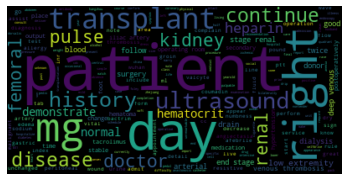

In [409]:
# Start with one review:
text = df.iloc[0,4]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

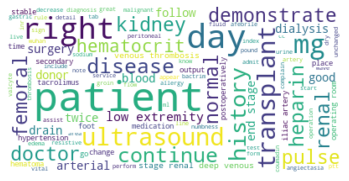

In [410]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [402]:
text = " ".join(review for review in df.cleaned)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 8057556 words in the combination of all review.


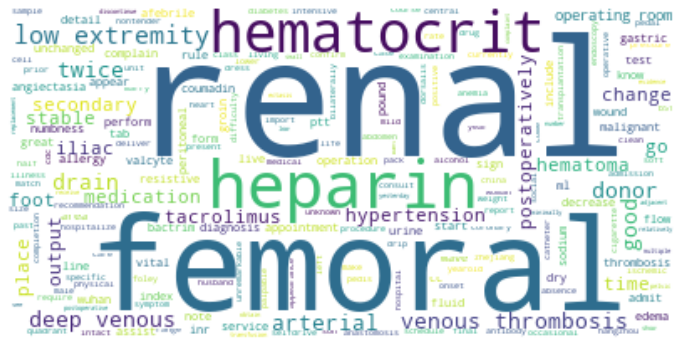

In [428]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["patient", "day", "history", "one", "tablet", "daily", "mg", 
                  "continue", "right","doctor", "disease", "demonstrate", "normal",
                  "transplant","pulse","ultrasound","kidney","stage","surgery","end",
                 "artery","dialysis","follow","blood"]) # added these words after multiple iterations of the wordcloud

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [436]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [708]:
df.iloc[30,0]

'new confirmed covid19 patient in japan male 60s symptom onset 220 fever went to doctor 221 nagoya city service medicine  allergies patient recorded as having no known allergies to drugs  attending chief complaint right leg pain and swelling  major surgical or invasive procedure temporary ivc filter placement esophagogastroduodenoscopy colonoscopy   history of present illness 54 yo male with pmhx of esrd thought to be  htn sp deceased donor kidney transplant in  htn and gout who presented to the er with right leg swelling and pain x 3 days he denies any recent injury or prolonged travel and has not had problems with leg swelling in the past he additionally denies sob or cp  in the ed patient was evaluated and noted to have a tender erythematous right le with a right calf measuring 43cm compared to 38 cm of the left calf bilateral le dopplers were performed and showed a dvt in the right common femoral to the calf veins given his kidney disease renal transplant was consulted in the ed an

In [439]:
print("3 Random NOTES with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['cleaned']): 
    print('NOTES {}:\n'.format(index+1),review)

3 Random NOTES with Highest Polarity:
NOTES 1:
 new confirmed covid19 patient in taiwan male 80s father of case 28 service medicine  allergies ibuprofen  attending chief complaint upper gastrointestinal bleeding  major surgical or invasive procedure intensive care unit central line total of 9 red blood cell transfusions   history of present illness pt is a 75 yo male with mmp including ho pe htn paf on coumadin recent workup of anemia with hct in upper 20s who presents after went to pcp yesterday and found to have hct of  pt had a workup for anemia done in  hct was 34 over time been in midupper 20s iron studies in  showed iron 221 tibc 221 ferritin  workup for anemia included bmbs in  which showed no storage iron small lymphoid aggregates otherwise normal pt was started on iron tid  pt says that he has noticed that for the last week he has been sob when moving only and not at rest whereas normally he can walk up and down the stairs he has been having trouble walking a few feet before g

In [448]:
max_length = max(df['totalwords'])
min_length = min(df['totalwords'])

print(max_length)
print(min_length)

4897
30


In [72]:
tf1 = (df['lemmatized'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,patient,12
1,1130am,11
2,l,7
3,fracture,7
4,refills0,6
...,...,...
381,24,1
382,acetmnphnneg,1
383,agitation,1
384,glucoseneg,1


#  Tested positive for covid-19 (bool)

In [199]:
# covid
df['covid_mention'] = df['cleaned'].map(lambda x: True if 'covid19' in x else False)

df['covid_mention'].value_counts()

df = df.sort_values(by= 'covid_mention', ascending = True )

                                                cleaned  female  covid_mention
1081  new covid19 patient confirmed in switzerland m...   False           True
1080  new covid19 patient confirmed in croatia male ...   False           True
1079  new covid19 patient confirmed in algeria male ...   False           True
1078  new covid19 patient confirmed in afghanistan 3...    True           True
1077  new covid19 patient confirmed in austria 24 in...    True           True
...                                                 ...     ...            ...
5     new confirmed imported covid19 pneumonia in ti...    True           True
4     first confirmed imported cases in zhejiang pat...   False          False
3     first confirmed imported covid19 pneumonia pat...    True           True
2     first confirmed imported covid19 pneumonia pat...   False           True
1     new confirmed covid19 patient in tyumen russia...   False           True

[1081 rows x 3 columns]


In [200]:
df['covid_mention'].value_counts()

True     1080
False       1
Name: covid_mention, dtype: int64

In [209]:
df = df.sort_values(by= 'covid_mention', ascending = True )

### Things to note: 
- Index 4: Two patient profiles, could be clerical error. starts out describing male patient, actually female patient

# Consent


In [565]:
consent = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) consent\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
print((consent))


['he was consented and prepped', 'signed a consent', 'they gave consent for her', 'and the consent signed', 'patient was consented in the', 'prepared and consented for surgery', 'and he consented', 'the patients consent and the', 'but finally consented to an', 'obtained phone consent for procedures', 'ua labs consent home meds', 'informed and consented for the', 'after informed consent is now', 'her icu consent form as', 'the corresponding consent forms a', 'written informed consent was obtained', 'preprocedure written consent and confirmation', 'components he consented after it', 'patient was consented for a', 'and informed consent was obtained', 'the patient consented for exploratory', 'the patient consented for exploratory', 'preopped and consented for surgery', 'patient who consented to tpa', 'the patient consented to an', 'room after consent was obtained', 'after obtaining consent for bypass', 'prepared and consented as per', 'him and consent was signed', 'prepared and consented f

In [567]:
# 1 word before & 1 word after
consent_agree = sum(list(df['cleaned'].map(lambda x: re.findall(r"\S*(?:\s\S+) agree\S*(?:\s\S+)?\S*(?:\s\S+)?",x))), [])
print((consent_agree))

['patient always agreed to care', 'family has agreed to this', 'time they agreed with the', ' who agreed with stopping', 'who all agreed that she', 'were in agreement that', 'they too agreed that this', 'surgeon who agreed to accept', 'the patient agreed to proceed', 'the patient agreed to the', 'the above agreed that they', 'told and agreed to avoid', 'all services agreed that most', 'decision and agreed with these', ' they agreed with the', ' they agree that the', 'ir who agreed that no', 'her husband agreed during these', ' wife agrees', 'the patient agreed to a', ' patient agreed with this', 'and everyone agreed that the', 'currently only agrees to be', 'patient is agreeable to outpatient', 'currently only agrees to be', 'currently only agrees to be', 'him and agreed with solumedrol', 'her and agreed with the', 'rheumatology service agreed that the', 'is in agreement that the', 'the patient agreed to ctguided', 'he eventually agreed and underwent', 'bed and agree to live', 'were in

In [575]:
s_woman = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) woman \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
s_man = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) man \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
s_male = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) male \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
s_female = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) female \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])

print(len(s_woman))
print(len(s_man))
print(len(s_male))
print(len(s_female))

256
244
950
711


# BMI

In [1102]:
obese = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) obese \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
average = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+)diabetes\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
healthy = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) healthy \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
heavy = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) heavy \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])


In [1103]:
print(len(healthy))
print(len(obese))
print(len(heavy))

#print(average)

42
135
88


In [480]:
bmi_test = sum(list(df['cleaned'].map(lambda s: re.findall(r"bmi\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])

print((len(bmi_test)))

25


In [633]:
ht_1 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) bmi \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
ht_2 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) height \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
ht_3 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) inches \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
ht_4 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) feet \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
ht_4 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) feet \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])

#ht_5 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+)  \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])

#ht_5 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) in \S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])


print(len(ht_1))
print(len(ht_2))
print(len(ht_3))
print(len(ht_4))
#print(len(ht_5))

2
43
25
81
6


In [634]:

#print((ht_1))
#print((ht_2))
#print((ht_3))
#print((ht_4))
print((ht_5))

['prn albuterol meter dose inhaler two', ' atrovent meter dose inhaler six', ' albuterol meter dose inhaler six', 'an albuterol meter dose inhaler as', 'poqd albuterol meter dose inhaler two', 'poqhsprn albuterol meter dose inhaler two']


In [703]:
wt_1 = sum(list(df['cleaned'].map(lambda s: re.findall(r"weigh\S*(?:\s\S+)?\S*(?:\d+)?",s))), []) # weight 210, weighing 210, weighs 210
wt_2 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) kg\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
wt_3 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) lb\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
wt_4 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) kilogram\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
wt_5 = sum(list(df['cleaned'].map(lambda s: re.findall(r"\S*(?:\s\S+) wt\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])


In [704]:

print(len(wt_1))
print(len(wt_2))
print(len(wt_3))
print(len(wt_4))
#print(len(wt_5))

495
63
118
39


In [706]:
print((wt_4))

['micrograms per kilogram per minute', 'micrograms per kilogram per minute', 'preoperatively 96 kilograms at discharge', ' 7 kilograms', 'is 3 kilograms', 'weighed 79 kilograms', 'weight 4 kilograms', 'is 2 kilograms', 'weighed 7 kilograms', 'weight 99 kilograms height 5', 'increased 10 kilograms the patient', 'was 59 kilograms at discharge', 'was 7 kilograms', 'micrograms per kilogram per minute', 'micrograms per kilogram per minute', 'preoperatively 61 kilograms at discharge', ' 3 kilograms', 'preoperatively 9 kilograms and at', 'discharge 5 kilograms', 'micrograms per kilogram per minute', 'approximately 2 kilograms', 'mg per kilogram subcutaneous bid', 'micrograms per kilogram per minute', 'is 105 kilograms the patient', 'was 99 kilograms preoperative white', 'cc per kilogram per day', 'cc per kilogram per day', 'cc per kilogram per day', 'cc per kilogram per day', 'was 145 kilograms', 'weighed 140 kilograms preoperatively', 'cells per kilogram with marked', 'cells per kilogram', '

In [38]:
# check if in physical exam section?

physical_exam = sum(list(df['cleaned'].map(lambda s: re.findall(r"physical exam\S*(?:\s\S+)?\S*(?:\s\S+)?\S*(?:\s\S+)?",s))), [])
print((len(physical_exam)))

957


In [44]:
print(physical_exam)

['physical exam initial pe vitals', 'physical exam vs t 9', 'physical exam tmax 9 c', 'physical exam gen ill appearing', 'physical examination on admission anterior', 'physical exam preop general pleasant', 'physical exam vitals t 4', 'physical exam tc and tm5', 'physical exam t 4 bp', 'physical examination on arrival the', 'physical examination the patient was', 'physical exam pe vs bp', 'physical examination vital signs temperature', 'physical exam general frail thin', 'physical exam appears in pain', 'physical examination at that time', 'physical examination on admission the', 'physical examination general he was', 'physical exam o t af', 'physical exam on arrival gen', 'physical exam vital signs', 'physical examination the patient was', 'physical examination heart rate was', 'physical exam 7 16496 83', 'physical examination on admission the', 'physical exam vitals t bp14081', 'physical exam tm 3 tc', 'physical exam post surgery as', 'physical exam tmax 103 tcurrent', 'physical exam